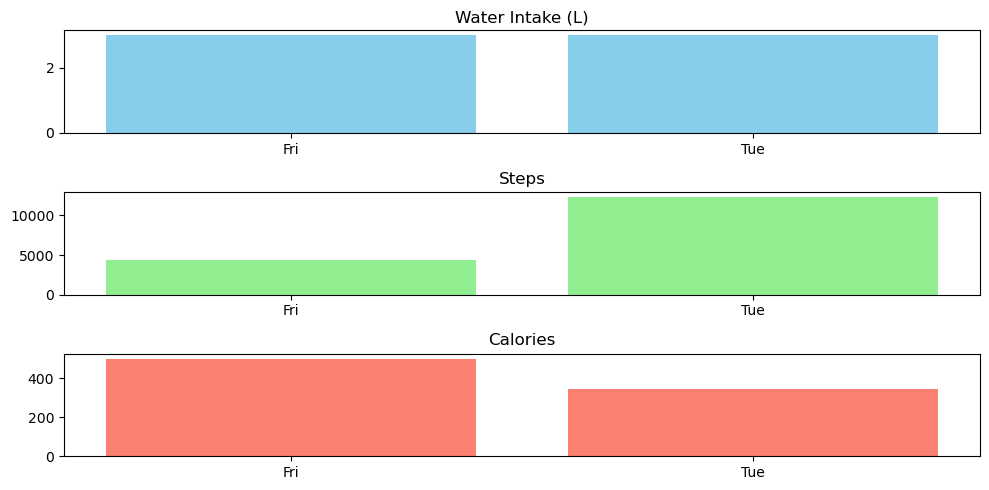

In [2]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from datetime import date, timedelta
import matplotlib.pyplot as plt

# File to store data
file_name = "health_data.csv"

# Initialize CSV if not exists
try:
    pd.read_csv(file_name)
except FileNotFoundError:
    df = pd.DataFrame(columns=["Date", "Water (L)", "Steps", "Calories"])
    df.to_csv(file_name, index=False)

# Function to save data
def save_data():
    today = date.today().strftime("%Y-%m-%d")
    water = entry_water.get()
    steps = entry_steps.get()
    calories = entry_calories.get()
    
    if not water or not steps or not calories:
        messagebox.showwarning("Input Error", "Please fill all fields")
        return
    
    df = pd.read_csv(file_name)
    df = pd.concat([df, pd.DataFrame([[today, float(water), int(steps), int(calories)]], columns=df.columns)], ignore_index=True)
    df.to_csv(file_name, index=False)
    messagebox.showinfo("Success", "Data saved successfully!")

# Function to plot weekly progress
def plot_progress():
    df = pd.read_csv(file_name)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Last 7 days
    today = pd.Timestamp(date.today())
    last_week = df[df['Date'] >= today - pd.Timedelta(days=6)]
    
    if last_week.empty:
        messagebox.showinfo("No Data", "No data available for the last 7 days")
        return
    
    last_week = last_week.sort_values('Date')
    dates = last_week['Date'].dt.strftime('%a')
    
    # Plot Water Intake
    plt.figure(figsize=(10,5))
    
    plt.subplot(3,1,1)
    plt.bar(dates, last_week['Water (L)'], color='skyblue')
    plt.title("Water Intake (L)")
    
    # Plot Steps
    plt.subplot(3,1,2)
    plt.bar(dates, last_week['Steps'], color='lightgreen')
    plt.title("Steps")
    
    # Plot Calories
    plt.subplot(3,1,3)
    plt.bar(dates, last_week['Calories'], color='salmon')
    plt.title("Calories")
    
    plt.tight_layout()
    plt.show()

# GUI
root = tk.Tk()
root.title("Mini Health Tracker")

tk.Label(root, text="Water Intake (L)").grid(row=0, column=0)
tk.Label(root, text="Steps").grid(row=1, column=0)
tk.Label(root, text="Calories").grid(row=2, column=0)

entry_water = tk.Entry(root)
entry_steps = tk.Entry(root)
entry_calories = tk.Entry(root)

entry_water.grid(row=0, column=1)
entry_steps.grid(row=1, column=1)
entry_calories.grid(row=2, column=1)

tk.Button(root, text="Save", command=save_data).grid(row=3, column=0, columnspan=2, pady=5)
tk.Button(root, text="Show Weekly Progress", command=plot_progress).grid(row=4, column=0, columnspan=2, pady=5)

root.mainloop()
